# Prepare rules for the all the data sets
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules


In [3]:
book = pd.read_csv('C:\\Excelr Data\\Assignments\\Association Rules\\book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
from collections import Counter

In [6]:
all_book_list = []

In [7]:
all_book_list = [i for item in book for i in item]
all_book_list

['C',
 'h',
 'i',
 'l',
 'd',
 'B',
 'k',
 's',
 'Y',
 'o',
 'u',
 't',
 'h',
 'B',
 'k',
 's',
 'C',
 'o',
 'o',
 'k',
 'B',
 'k',
 's',
 'D',
 'o',
 'I',
 't',
 'Y',
 'B',
 'k',
 's',
 'R',
 'e',
 'f',
 'B',
 'k',
 's',
 'A',
 'r',
 't',
 'B',
 'k',
 's',
 'G',
 'e',
 'o',
 'g',
 'B',
 'k',
 's',
 'I',
 't',
 'a',
 'l',
 'C',
 'o',
 'o',
 'k',
 'I',
 't',
 'a',
 'l',
 'A',
 't',
 'l',
 'a',
 's',
 'I',
 't',
 'a',
 'l',
 'A',
 'r',
 't',
 'F',
 'l',
 'o',
 'r',
 'e',
 'n',
 'c',
 'e']

In [8]:
item_frequencies = Counter(all_book_list)

In [9]:
item_frequencies

Counter({'C': 3,
         'h': 2,
         'i': 1,
         'l': 6,
         'd': 1,
         'B': 7,
         'k': 9,
         's': 8,
         'Y': 2,
         'o': 8,
         'u': 1,
         't': 8,
         'D': 1,
         'I': 4,
         'R': 1,
         'e': 4,
         'f': 1,
         'A': 3,
         'r': 3,
         'G': 1,
         'g': 1,
         'a': 4,
         'F': 1,
         'n': 1,
         'c': 1})

In [10]:
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])


In [11]:
item_frequencies

[('i', 1),
 ('d', 1),
 ('u', 1),
 ('D', 1),
 ('R', 1),
 ('f', 1),
 ('G', 1),
 ('g', 1),
 ('F', 1),
 ('n', 1),
 ('c', 1),
 ('h', 2),
 ('Y', 2),
 ('C', 3),
 ('A', 3),
 ('r', 3),
 ('I', 4),
 ('e', 4),
 ('a', 4),
 ('l', 6),
 ('B', 7),
 ('s', 8),
 ('o', 8),
 ('t', 8),
 ('k', 9)]

In [12]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
frequencies


[9, 8, 8, 8, 7, 6, 4, 4, 4, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [13]:
items = list(reversed([i[0] for i in item_frequencies]))
items

['k',
 't',
 'o',
 's',
 'B',
 'l',
 'a',
 'e',
 'I',
 'r',
 'A',
 'C',
 'Y',
 'h',
 'c',
 'n',
 'F',
 'g',
 'G',
 'f',
 'R',
 'D',
 'u',
 'd',
 'i']

In [14]:
# barplot of top 10 
import matplotlib.pyplot as plt


Text(0, 0.5, 'Count')

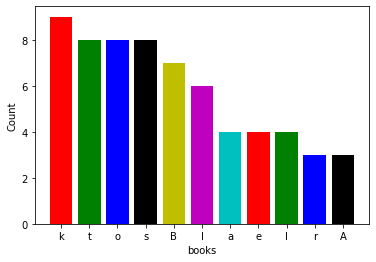

In [15]:
plt.bar(height = frequencies[0:11],x = list(range(0,11)),color='rgbkymc');plt.xticks(list(range(0,11),),items[0:11]);plt.xlabel("books")
plt.ylabel("Count")
#top 10 purchased books.


In [16]:
#top 10 purchased books.
frequent_itemsets = apriori(book, min_support=0.005, max_len=3,use_colnames = True)#building apriori model-max lenght- max item set will be 3.
frequent_itemsets


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
219,0.0130,"(GeogBks, Florence, ItalCook)"
220,0.0115,"(ItalArt, GeogBks, ItalAtlas)"
221,0.0090,"(ItalArt, GeogBks, Florence)"
222,0.0125,"(ItalArt, ItalAtlas, ItalCook)"


In [17]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

Text(0, 0.5, 'support')

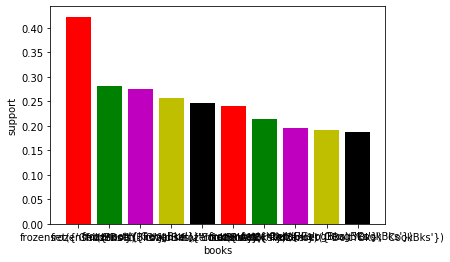

In [18]:
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('books');plt.ylabel('support') 


In [19]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
3,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
4,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
...,...,...,...,...,...,...,...,...,...
1049,"(ItalArt, Florence)",(YouthBks),0.0125,0.2475,0.0055,0.440000,1.777778,0.002406,1.343750
1050,"(YouthBks, Florence)",(ItalArt),0.0255,0.0485,0.0055,0.215686,4.447140,0.004263,1.213163
1051,(ItalArt),"(YouthBks, Florence)",0.0485,0.0255,0.0055,0.113402,4.447140,0.004263,1.099145
1052,(YouthBks),"(ItalArt, Florence)",0.2475,0.0125,0.0055,0.022222,1.777778,0.002406,1.009943


In [20]:
rules.sort_values('lift',ascending = False,inplace=True)#with respect to lift we are doing descending order.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
749,"(ItalArt, RefBks)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
752,(ItalAtlas),"(ItalArt, RefBks)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
744,"(ItalAtlas, ArtBks)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
745,(ItalArt),"(ItalAtlas, ArtBks)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
353,(ItalArt),"(ArtBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
...,...,...,...,...,...,...,...,...,...
301,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
410,(DoItYBks),(Florence),0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605
411,(Florence),(DoItYBks),0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727
306,(CookBks),(Florence),0.4310,0.1085,0.0475,0.110209,1.015749,0.000737,1.001920


## To eliminate Redudancy in Rules  


In [21]:
def to_list(i):
    return (sorted(list(i)))


In [22]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)


In [23]:
ma_X

749    [ItalArt, RefBks, ItalAtlas]
752    [ItalAtlas, ItalArt, RefBks]
744    [ArtBks, ItalAtlas, ItalArt]
745    [ItalArt, ArtBks, ItalAtlas]
353     [ItalArt, ArtBks, ItalCook]
                   ...             
301            [Florence, ChildBks]
410            [DoItYBks, Florence]
411            [Florence, DoItYBks]
306             [CookBks, Florence]
307             [Florence, CookBks]
Length: 1054, dtype: object

In [24]:
ma_X = ma_X.apply(sorted)

In [25]:
ma_X

749    [ItalArt, ItalAtlas, RefBks]
752    [ItalArt, ItalAtlas, RefBks]
744    [ArtBks, ItalArt, ItalAtlas]
745    [ArtBks, ItalArt, ItalAtlas]
353     [ArtBks, ItalArt, ItalCook]
                   ...             
301            [ChildBks, Florence]
410            [DoItYBks, Florence]
411            [DoItYBks, Florence]
306             [CookBks, Florence]
307             [CookBks, Florence]
Length: 1054, dtype: object

In [26]:
rules_sets = list(ma_X)

In [27]:
rules_sets

[['ItalArt', 'ItalAtlas', 'RefBks'],
 ['ItalArt', 'ItalAtlas', 'RefBks'],
 ['ArtBks', 'ItalArt', 'ItalAtlas'],
 ['ArtBks', 'ItalArt', 'ItalAtlas'],
 ['ArtBks', 'ItalArt', 'ItalCook'],
 ['ArtBks', 'ItalArt', 'ItalCook'],
 ['ItalAtlas', 'ItalCook', 'RefBks'],
 ['ItalAtlas', 'ItalCook', 'RefBks'],
 ['GeogBks', 'ItalArt', 'ItalAtlas'],
 ['GeogBks', 'ItalArt', 'ItalAtlas'],
 ['ItalArt', 'ItalAtlas', 'ItalCook'],
 ['ItalArt', 'ItalAtlas', 'ItalCook'],
 ['Florence', 'ItalArt', 'ItalCook'],
 ['Florence', 'ItalArt', 'ItalCook'],
 ['ChildBks', 'ItalArt', 'ItalAtlas'],
 ['ChildBks', 'ItalArt', 'ItalAtlas'],
 ['GeogBks', 'ItalArt', 'ItalAtlas'],
 ['GeogBks', 'ItalArt', 'ItalAtlas'],
 ['ChildBks', 'ItalArt', 'ItalAtlas'],
 ['ChildBks', 'ItalArt', 'ItalAtlas'],
 ['DoItYBks', 'ItalArt', 'ItalAtlas'],
 ['DoItYBks', 'ItalArt', 'ItalAtlas'],
 ['ItalArt', 'ItalAtlas', 'YouthBks'],
 ['ItalArt', 'ItalAtlas', 'YouthBks'],
 ['ItalArt', 'ItalAtlas', 'YouthBks'],
 ['ItalArt', 'ItalAtlas', 'YouthBks'],
 ['CookB

In [28]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]


In [29]:
unique_rules_sets

[['CookBks', 'ItalAtlas'],
 ['ChildBks', 'ItalArt'],
 ['ChildBks', 'DoItYBks', 'GeogBks'],
 ['ChildBks', 'CookBks'],
 ['ChildBks', 'Florence'],
 ['Florence', 'GeogBks', 'RefBks'],
 ['DoItYBks', 'GeogBks'],
 ['DoItYBks', 'Florence'],
 ['ArtBks', 'ItalCook', 'YouthBks'],
 ['Florence', 'GeogBks', 'ItalCook'],
 ['Florence', 'ItalArt', 'ItalCook'],
 ['ChildBks', 'GeogBks', 'ItalAtlas'],
 ['ArtBks', 'ItalArt', 'ItalAtlas'],
 ['DoItYBks', 'Florence', 'GeogBks'],
 ['GeogBks', 'ItalArt', 'ItalAtlas'],
 ['ArtBks', 'RefBks', 'YouthBks'],
 ['ArtBks', 'ItalAtlas', 'RefBks'],
 ['CookBks', 'DoItYBks', 'Florence'],
 ['ChildBks', 'RefBks', 'YouthBks'],
 ['ItalArt', 'ItalAtlas', 'YouthBks'],
 ['ArtBks', 'Florence', 'GeogBks'],
 ['ArtBks', 'GeogBks', 'ItalAtlas'],
 ['ItalCook', 'RefBks', 'YouthBks'],
 ['ChildBks', 'CookBks', 'YouthBks'],
 ['ArtBks', 'ItalAtlas', 'ItalCook'],
 ['DoItYBks', 'RefBks'],
 ['DoItYBks', 'ItalCook'],
 ['Florence', 'ItalArt', 'YouthBks'],
 ['GeogBks', 'ItalArt', 'ItalCook'],
 ['D

In [30]:
index_rules = []

In [31]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


In [32]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]


In [33]:
rules_no_redudancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
493,(CookBks),(ItalAtlas),0.4310,0.0370,0.0285,0.066125,1.787170,0.012553,1.031188
379,(ItalArt),(ChildBks),0.0485,0.4230,0.0360,0.742268,1.754771,0.015484,2.238760
74,"(ChildBks, DoItYBks)",(GeogBks),0.1840,0.2760,0.1045,0.567935,2.057735,0.053716,1.675673
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
300,(ChildBks),(Florence),0.4230,0.1085,0.0485,0.114657,1.056748,0.002605,1.006955
...,...,...,...,...,...,...,...,...,...
215,"(YouthBks, ArtBks)",(GeogBks),0.1010,0.2760,0.0650,0.643564,2.331755,0.037124,2.031222
7,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
356,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
805,"(DoItYBks, CookBks)",(ItalAtlas),0.1875,0.0370,0.0150,0.080000,2.162162,0.008063,1.046739


In [34]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
749,"(ItalArt, RefBks)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
744,"(ItalAtlas, ArtBks)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
353,(ItalArt),"(ArtBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
561,"(RefBks, ItalCook)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
923,(ItalArt),"(GeogBks, ItalAtlas)",0.0485,0.0205,0.0115,0.237113,11.566507,0.010506,1.283939
899,(ItalArt),"(ItalAtlas, ItalCook)",0.0485,0.0230,0.0125,0.257732,11.205737,0.011385,1.316236
965,(ItalArt),"(Florence, ItalCook)",0.0485,0.0175,0.0095,0.195876,11.192931,0.008651,1.221827
810,"(ChildBks, ItalArt)",(ItalAtlas),0.0360,0.0370,0.0145,0.402778,10.885886,0.013168,1.612465
971,(ItalArt),"(DoItYBks, ItalAtlas)",0.0485,0.0190,0.0095,0.195876,10.309278,0.008578,1.219962
1007,(ItalArt),"(YouthBks, ItalAtlas)",0.0485,0.0175,0.0085,0.175258,10.014728,0.007651,1.191281


In [35]:
## 3D plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
support = rules_no_redudancy["support"]
confidence = rules_no_redudancy["confidence"]
lift = rules_no_redudancy["lift"]

Text(0.5, 0, 'lift')

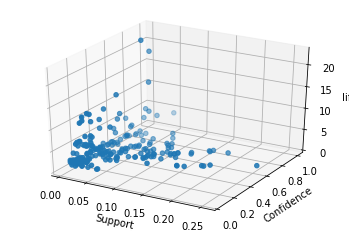

In [37]:
fig = plt.figure()
ax= fig.add_subplot(111, projection = '3d')
ax.scatter(support,confidence,lift)
ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("lift")

Text(0, 0.5, 'confidence')

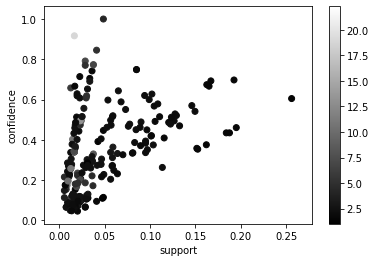

In [38]:
## Scatter plot
import scipy as sp
plt.scatter(x=support, y=confidence, c=lift , cmap = 'gray')
plt.colorbar()
plt.xlabel("support")
plt.ylabel("confidence")

In [39]:
#top 10 purchased books.
frequent_itemsets = apriori(book, min_support=0.005, max_len=3,use_colnames = True)#building apriori model-max lenght- max item set will be 3.
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
219,0.0130,"(GeogBks, Florence, ItalCook)"
220,0.0115,"(ItalArt, GeogBks, ItalAtlas)"
221,0.0090,"(ItalArt, GeogBks, Florence)"
222,0.0125,"(ItalArt, ItalAtlas, ItalCook)"


### Changing the support value to 0.007

In [40]:
frequent_items1 = apriori(book,min_support = 0.007,max_len = 4 , use_colnames = True)

In [41]:
#Most frequent items based on the support, decending order
frequent_items1.sort_values('support', ascending = False, inplace = True)

In [42]:
##Building rules
rules2 = association_rules(frequent_items1 , metric = 'lift' , min_threshold = 1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
3,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
4,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
...,...,...,...,...,...,...,...,...,...
4551,"(ItalAtlas, ItalCook)","(DoItYBks, GeogBks)",0.0230,0.1325,0.0070,0.304348,2.296965,0.003952,1.247031
4552,(DoItYBks),"(GeogBks, ItalAtlas, ItalCook)",0.2820,0.0150,0.0070,0.024823,1.654846,0.002770,1.010073
4553,(GeogBks),"(DoItYBks, ItalAtlas, ItalCook)",0.2760,0.0125,0.0070,0.025362,2.028986,0.003550,1.013197
4554,(ItalAtlas),"(DoItYBks, GeogBks, ItalCook)",0.0370,0.0345,0.0070,0.189189,5.483745,0.005724,1.190783


In [43]:
##Rules2 are the rules which are generated with the minimum threshold as 1
rules2.sort_values('lift',ascending = False , inplace = True)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2158,"(ItalArt, RefBks)","(ItalAtlas, ArtBks)",0.0200,0.0180,0.0165,0.825000,45.833333,0.016140,5.611429
2159,"(ItalAtlas, ArtBks)","(ItalArt, RefBks)",0.0180,0.0200,0.0165,0.916667,45.833333,0.016140,11.760000
3315,"(GeogBks, ItalAtlas)","(ItalArt, RefBks)",0.0205,0.0200,0.0115,0.560976,28.048780,0.011090,2.232222
3314,"(ItalArt, RefBks)","(GeogBks, ItalAtlas)",0.0200,0.0205,0.0115,0.575000,28.048780,0.011090,2.304706
3121,"(ItalAtlas, ItalCook)","(ItalArt, RefBks)",0.0230,0.0200,0.0125,0.543478,27.173913,0.012040,2.146667
...,...,...,...,...,...,...,...,...,...
1012,(DoItYBks),(Florence),0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605
3576,"(ChildBks, YouthBks, DoItYBks)",(Florence),0.0950,0.1085,0.0105,0.110526,1.018676,0.000192,1.002278
3589,(Florence),"(ChildBks, YouthBks, DoItYBks)",0.1085,0.0950,0.0105,0.096774,1.018676,0.000192,1.001964
670,(CookBks),(Florence),0.4310,0.1085,0.0475,0.110209,1.015749,0.000737,1.001920


## Elimiinating the reducdancies

In [44]:
def to_list1(i):
    return(sorted(i))

In [45]:
ma_x1 = rules2.antecedents.apply(to_list1)+ rules2.consequents.apply(to_list1)


In [46]:
ma_x1 = ma_x1.apply(sorted)

In [47]:
return_rules1 = list(ma_x1)

In [48]:
unique_rules1 = [list(m) for m in set(tuple(i) for i  in return_rules1 )]


In [49]:
index_rules1 = []
for i in unique_rules1:
    index_rules1.append(return_rules1.index(i))

In [50]:
### eliminate rules with reducdancies 
rules_no_redudancy = rules2.iloc[index_rules1,:]

In [51]:
##Sorting the rules
rules_no_redudancy.sort_values('lift', ascending = False, inplace = True)


C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
## 3D plots
support2 =  rules_no_redudancy["support"]
confidence2 =   rules_no_redudancy["confidence"]
lift2 =  rules_no_redudancy["lift"]


Text(0.5, 0, 'lift')

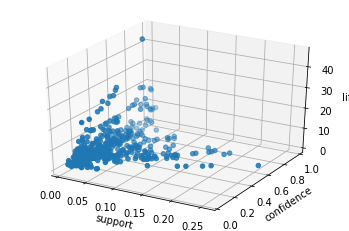

In [53]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support2,confidence2,lift2)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")


Text(0, 0.5, 'confidence')

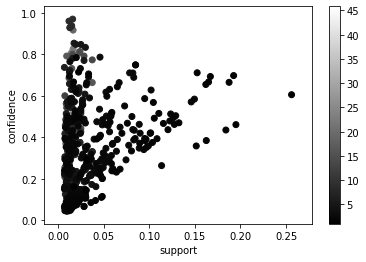

In [54]:
## Scatter plot
plt.scatter(support2,confidence2, c =lift2, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")